# Tarea Semanal 15
## Síntesis de parámetros Scattering

### Juan Costa Suárez

In [1]:
from IPython.display import IFrame
IFrame("pdf/TS15.pdf", width=800, height=1000)

1. Obtenga la impedancia de entrada al cuadripolo A, cargado con un resistor de 1Ω a la salida.
2. Sintetice A como un cuadripolo escalera.

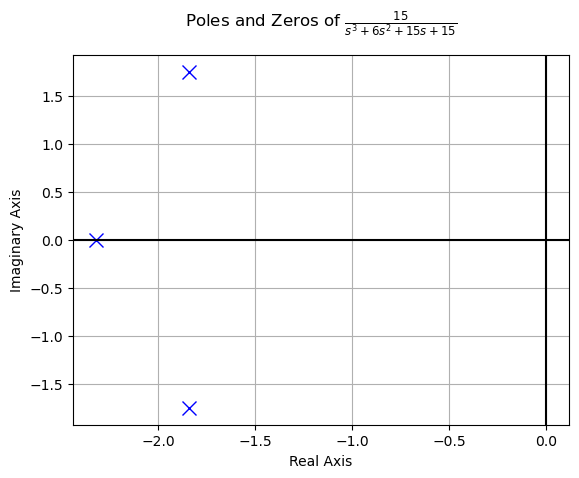

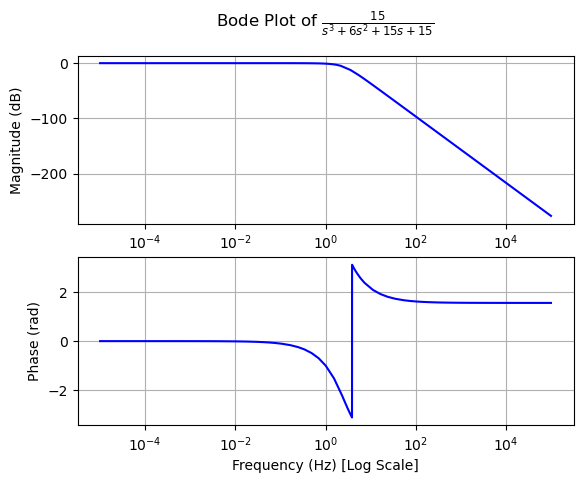

In [1]:
import sympy as sp
from sympy import ground_roots, real_roots, nroots
from sympy.abc import s
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot
import matplotlib.pyplot as plt
from scipy import signal as sig
import splane as tc2

s = sp.symbols('s', complex=True)

w = sp.symbols('w', complex=True)

T_s = 15/(s**3 + 6*s**2 +15*s +15)
T_s_ = 15/(-s**3 + 6*s**2 -15*s +15)

T_s_num, T_s_den = sp.fraction(sp.factor(T_s))

tf_ts = TransferFunction(T_s_num, T_s_den, s)

fig = plt.figure()  # a new figure window
ax = pole_zero_plot(tf_ts, show  = False) 
display(fig)

bode_plot(tf_ts)


In [2]:
S_21 = T_s

S_11_2 = sp.cancel(T_s*T_s_ - 1)

display(S_11_2)

n,d = sp.fraction(S_11_2)

#roots1 = real_roots(n)
#roots2 = nroots(n)

#roots3 = real_roots( d )
#roots4 = nroots(d)

#display(roots1)
#display(roots2)
#display(roots3)
#display(roots4)

S_11= tc2.modsq2mod_s(S_11_2)

display(S_11)


(-s**6 + 6*s**4 - 45*s**2)/(s**6 - 6*s**4 + 45*s**2 - 225)

s*(s**2 + 2*sqrt(3)*5**(1/4)*s*cos(atan(2)/2) + 3*sqrt(5))/(s**3 + 6*s**2 + 15*s + 15)

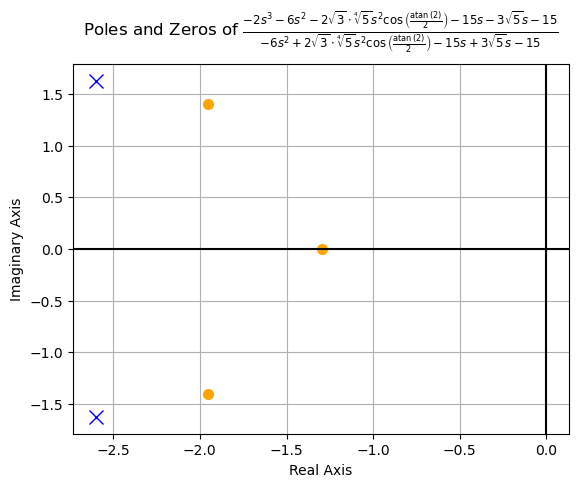

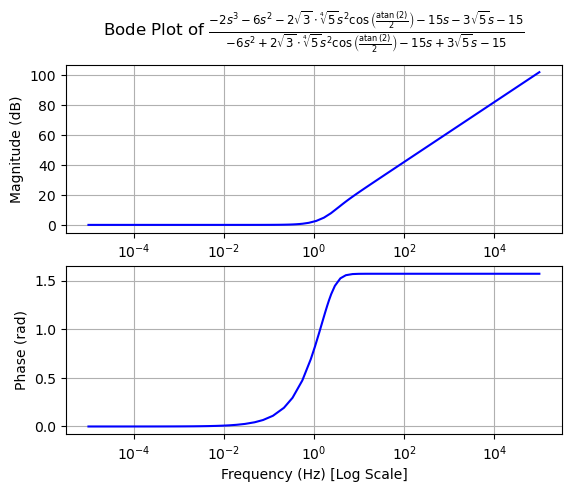

In [8]:
## Anoto los resultados de display, luego:
#num = s*(s + complex(2.20320266118432,1.36165412871613) ) * (s + complex(2.20320266118432,-1.36165412871613) )
#den = (s + 2.32218535462609)*(s + complex(1.83890732268696,- 1.75438095978372) )*(s + complex(1.83890732268696, 1.75438095978372) )
#S_11 = num  / den

R_0 = 1

Z1 = R_0 * sp.simplify(sp.expand(sp.simplify(sp.expand(1+S_11))/sp.simplify(sp.expand((1-S_11)))))

Z1 = sp.cancel(sp.simplify(Z1))

Z1_num, Z1_den = sp.fraction(sp.factor(Z1))

tf1 = TransferFunction(Z1_num, Z1_den, s)

fig = plt.figure()  # a new figure window
ax = pole_zero_plot(tf1, show  = False) 

display(fig)

bode_plot(tf1)



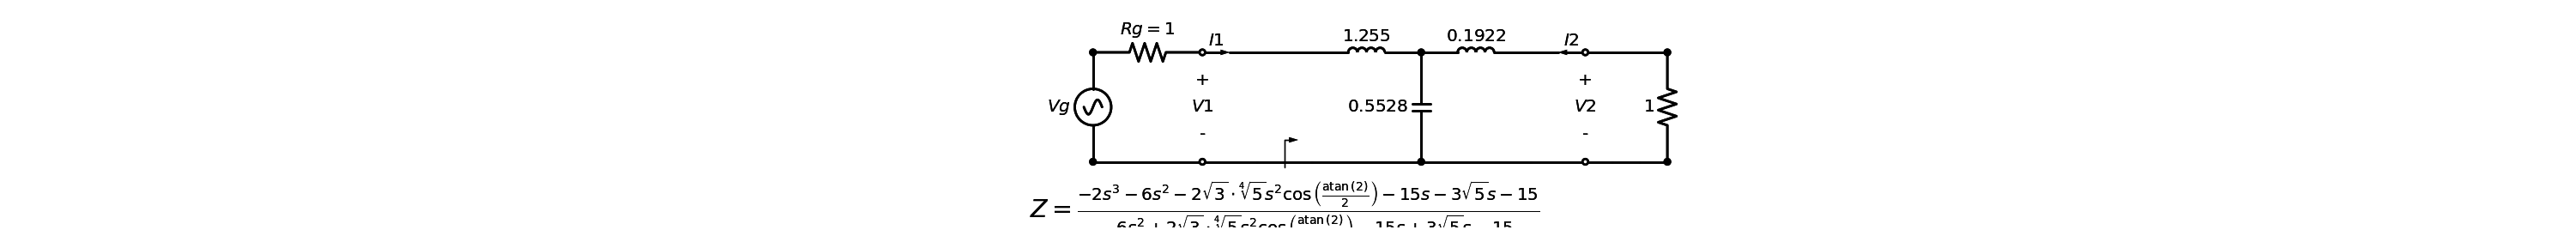

In [12]:
import sympy as sp
import splane as tc2
from schemdraw import Drawing
from schemdraw.elements import SourceSin, Resistor, Capacitor, Inductor

# Para sintetizar la red cumpliendo con la transferencia tengo que remover los polos en infinito

Z2, ZA = tc2.remover_polo_infinito(Z1)

la = ZA / s

Y2, YA = tc2.remover_polo_infinito(1/Z2)

ca = YA / s

Z3, ZB = tc2.remover_polo_infinito(1/Y2)

lb = ZB / s

Y4, YC = tc2.remover_polo_infinito(1/Z3)

ge = sp.cancel(sp.simplify(Y4))

# Dibujo de la red sintetizada

d = Drawing(unit=3)

d = tc2.dibujar_elemento_derivacion(d, SourceSin, 'Vg')

d = tc2.dibujar_elemento_serie(d, Resistor, "Rg=1")

d = tc2.dibujar_puerto_entrada(d,
                        voltage_lbl = ('+', '$V1$', '-'), 
                        current_lbl = '$I1$')

d, zz_lbl = tc2.dibujar_funcion_exc_abajo(d, 
                                          'Z',  
                                          Z1, 
                                          hacia_salida = True,
                                          k_gap_width = 0.5)

d = tc2.dibujar_elemento_serie(d,Inductor, la.evalf(4))

d = tc2.dibujar_elemento_derivacion(d, Capacitor, ca.evalf(4))

d = tc2.dibujar_elemento_serie(d,Inductor, lb.evalf(4))

d = tc2.dibujar_puerto_salida(d,
                        voltage_lbl = ('+', '$V2$', '-'), 
                        current_lbl = '$I2$')

d = tc2.dibujar_espacio_derivacion(d)
d = tc2.dibujar_espacio_derivacion(d)
d = tc2.dibujar_espacio_derivacion(d)

d = tc2.dibujar_elemento_derivacion(d, Resistor, ge)

display(d)

3) Simule el comportamiento de la red en LTspice graficando S21 y S11 en función de la frecuencia. (Ver explicación de Agustín Alba Chicar 1h 48m)

![img](img/Circuito_s_Desn_Rev2.png)

Este es el circuito obtenido por la síntesis. Para analizar los parámetros S primero verificamos que tenga forma de filtro de Bessel. La siguiente gráfica muestra la Respuesta en frecuencia del módulo y el retardo de grupo. Como puede apresiarse el retardo de grupo es prácticamente constante en la banda de paso y además tiene la frecuencia de corte en 1.7.

![img](img/AC_sim_Mod_Grp_DelayRev2.png)

La siguiente gráfica muestra como cambia la frecuencia de corte normalizada según el orden del filtro:

![img](img/Bessel.png)

Donde podemos corroborar que para filtros Bessel de orden 3 la frecuencia de corte normalizada es 1.7.

Luego la simulación de los parámetros S es:

![img](img/AC_sim_s_Rev2.png)


4) Explique el comportamiento de A a partir de los valores de S11 en las siguientes frecuencias:
- centro de la banda de paso
- frecuencia de corte
- transición y centro de la banda de detenida

En el centro de la banda de la transferencia (0 Hz) tenemos un cero en S11, esto hace referencia a que tenemos una máxima transferencia de energía hacia la carga. Por lo tanto podemos concluír que la potencia que llega a la carga es igual a la de la fuente y por lo tanto la transferencia es 1.

En la frecuencia de corte de S_{11} tenemos 3dB de atenuación. Por lo tanto la mitad de la tensión de la fuente llega a la carga. Este punto coincide, por lo tanto con la frecuencia de corte del filtro.

En la transición tenemos un decenso abrupto de el S_{11}, esto nos permite darnos cuenta que cada vez menos energía es transferida a la R de carga, y cada vez mas energía es consumida en el resistor de carga. Por lo tanto en la transferencia deberíamos ver una caída abrupta también.


5) Modifique el circuito para que la frecuencia de corte sea 2 π 10⁶ rad/s y la resistencia del generador sea 50Ω.

Debido a que el circuito realizado tiene parametrizada la impedancia y la frecuencia, esto se puede realizar fácilmente cambiando esos parámetros

![img](img/Circuito_s_Desn_Rev2.png)

